# 인덱스 개요

1. 인덱스는 쿼리 작업을 매우 효율적으로 만든다.
2. 인덱스를 만들면 도큐먼트 생성 수정 시 속도 저하가 생긴다.
3. 다수의 필드를 대상으로 조회를 할 때는 복합 인덱스가 유용하다.
4. a-b 복합 인덱스는 a 단순 인덱스와 같은 기능을 할 수 있다.

# 복제 세트 정의

복제 세트는 같은 정보를 공유하는 Data Set이다.

## why 복제?

1. 높은 가용성을 위해서
2. 정보의 안전한 보호를 위해
3. Read 속도를 빠르게 하기 위해서

### 복제세트의 구성원

복제세트는 프라이머리, 세컨더리, 아비터 구성원으로 이루어져 있다.<br>
Heartbeat으로 서로의 상태를 확인한다.

# 복제 세트의 선거
프라이머리가 무슨 이유에서든지 죽게 되면, 복제 세트 구성원 중 과반수의 세컨더리가 이를 감지하여 **선거**를 개최하기로 결정한다.<br>

세컨더리와 아비터는 새로운 프라이머리를 뽑는 투표를 하게된다.<br>
우선순위가 높은 순서대로 세컨더리는 프라이머리 후보가 되고, 과반수의 찬성표를 받은 세컨더리는 프라이머리가 된다.<br>
<br>
만약 별문제가 없으면 투표권자들은 찬성표를 던지지만, 다음과 같은 경우에는 반대표를 던진다.
- primayry가 아직 제대로 작동안할시
- 후보 보다 자기 자신이 최신 데이터를 전달 받았을 경우

## 복제 세트의 장점

세컨더리를 활용해 읽기 기능을 확장할 수 있다.

## Read-Concern과 Write-Concern이 필요한 이유

복제 세트에서 구성원의 정보가 동기화되는데에는 필연적으로 시간이 필요<br>
<br>
### Read-Concern
어느 정도 동기화  수준을 기준으로 쓰기 작업을 마무리할지 설정
### Write-Concern
어느 정도 동기화 수준을 기준으로 정보를 읽어올지 설정

## Read-Concern 설정

설정예시
```python
ReadConcern(level='majority')
```
#### local
연결된 인스턴스에서만 정보를 불러온다.
#### majority
복제 세트 대다수에 저장된 정보로 불러온다
#### linearizable
시간 제한 내에 복제 세트 구성원의 정보를 확인해서 대다수에 저장된 정보로 불러온다.

## MongoDB의 쓰기 작업과 저널링

메모리에 정보를 저장하는 시간이 디스크에 저장하는 시간보다 훨씬 빠르다.<br>
쓰기 작업은 메모리에 변경 사항을 남겼다가 일정주기(50ms)로 디스크에 변경 사항을 기록한다.<br>
이처럼 디스크에 변경사항을 임시로 저장하는 작업을 **저널링**이라고한다.

# Write-Concern과 저널링

설정예시
```python
Writeconcern(w=1, wtimeout=200, j=True)
```
|필드|설명|
|-|-|
|w|복제세트의어느정도의구성원에쓰기작업이완료되어야전체쓰기작업이완료되었다고판단할지결정하는옵션,숫자나문자열로지정할수있다|
|j|이옵션이true값을가지면변경사항을바로저널링해서만약장애가발생하더라도문제가없게만든다,기본값은false|
|wtimeout|w옵션에서설정한구성원들을기다릴수있는최대시간(ms),주어진시간이지나도정해진구성원에쓰기작업이마무리되지않으면에러를반환하지만이미실행한쓰기작업자체는취소되지않는다쓰기작업이무한정지연되는것을막기위한옵션으로w값이1보다커야사용할수있다|

## Write-Concern의 W 옵션

|값|설명|
|-|-|
|0|쓰기작업이실제로수행됐는지확인하지않고쓰기작업을완료한다|
|1|(기본값)클라이언트와연결된인스턴스의쓰기작업을수행하면전체쓰기작업이완료된다|
|1보다 큰 자연수|값으로갖는숫자가복제세트에서쓰기작업을완료한구성원수와같으면전체쓰기작업이완료된다예를들어프라이머리1개와세컨더리2개로이루어진복제세트에서w:2로설정되었다면쓰기작업은한개의프라이머리와한개의세컨더리에서쓰기작업이실행되면전체쓰기작업이완료된다|
|majority|복제세트에서대다수의구성원이쓰기작업을수행하면전체쓰기작업이완료된다|

# 샤드 클러스터는 왜 필요한가?

성능 2배 좋은 서버를 쓰는 것보다 2개의 서버를 쓰는 게 경제적

### 샤드 클러스터의 구성

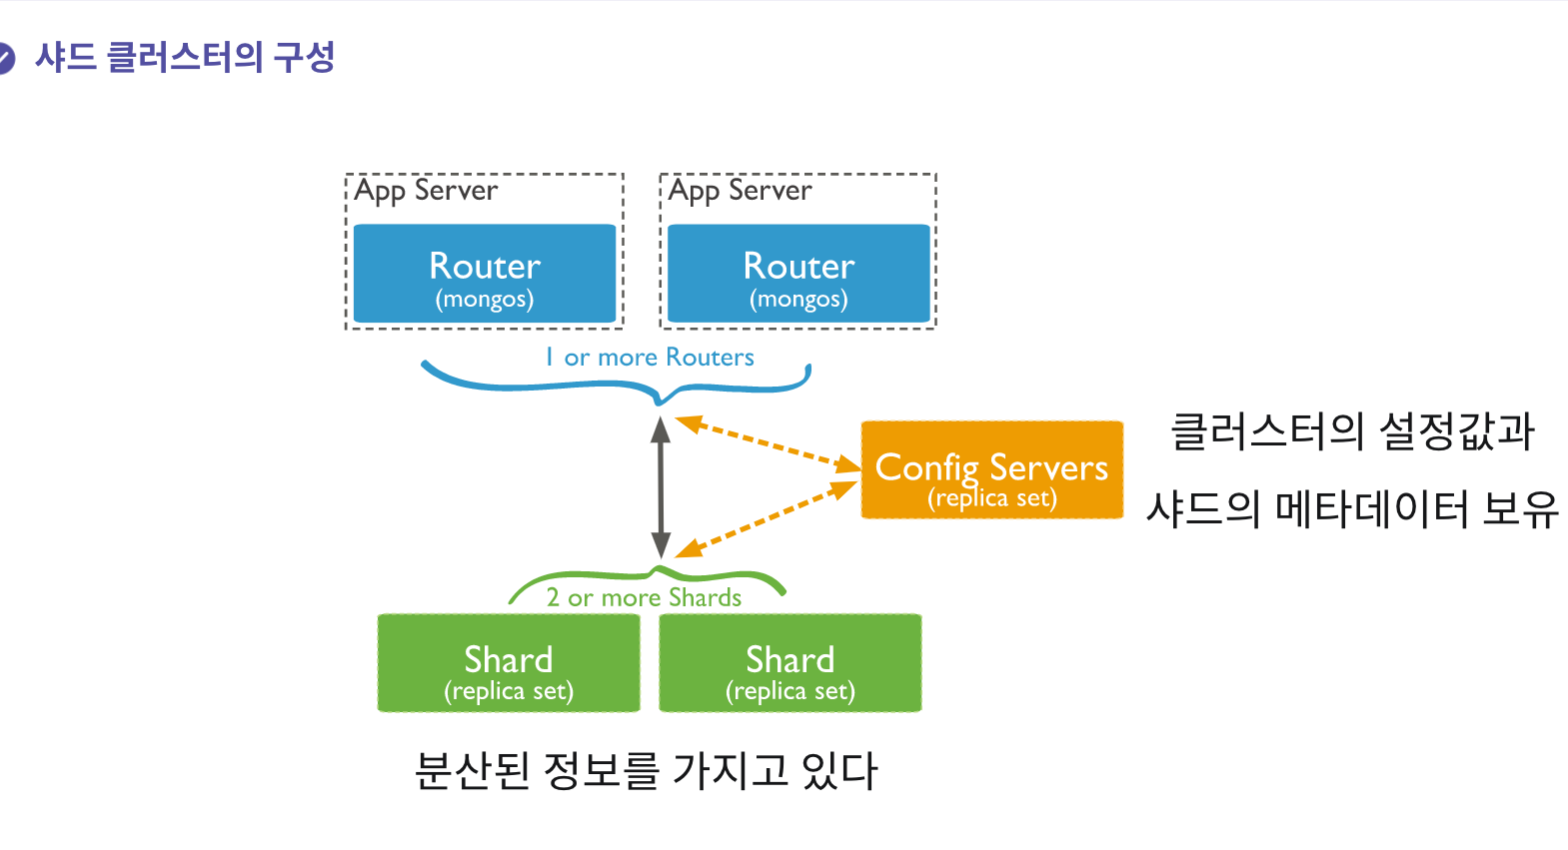

In [2]:
Image("sha.png")

## 샤드 클러스터의 작동 방식

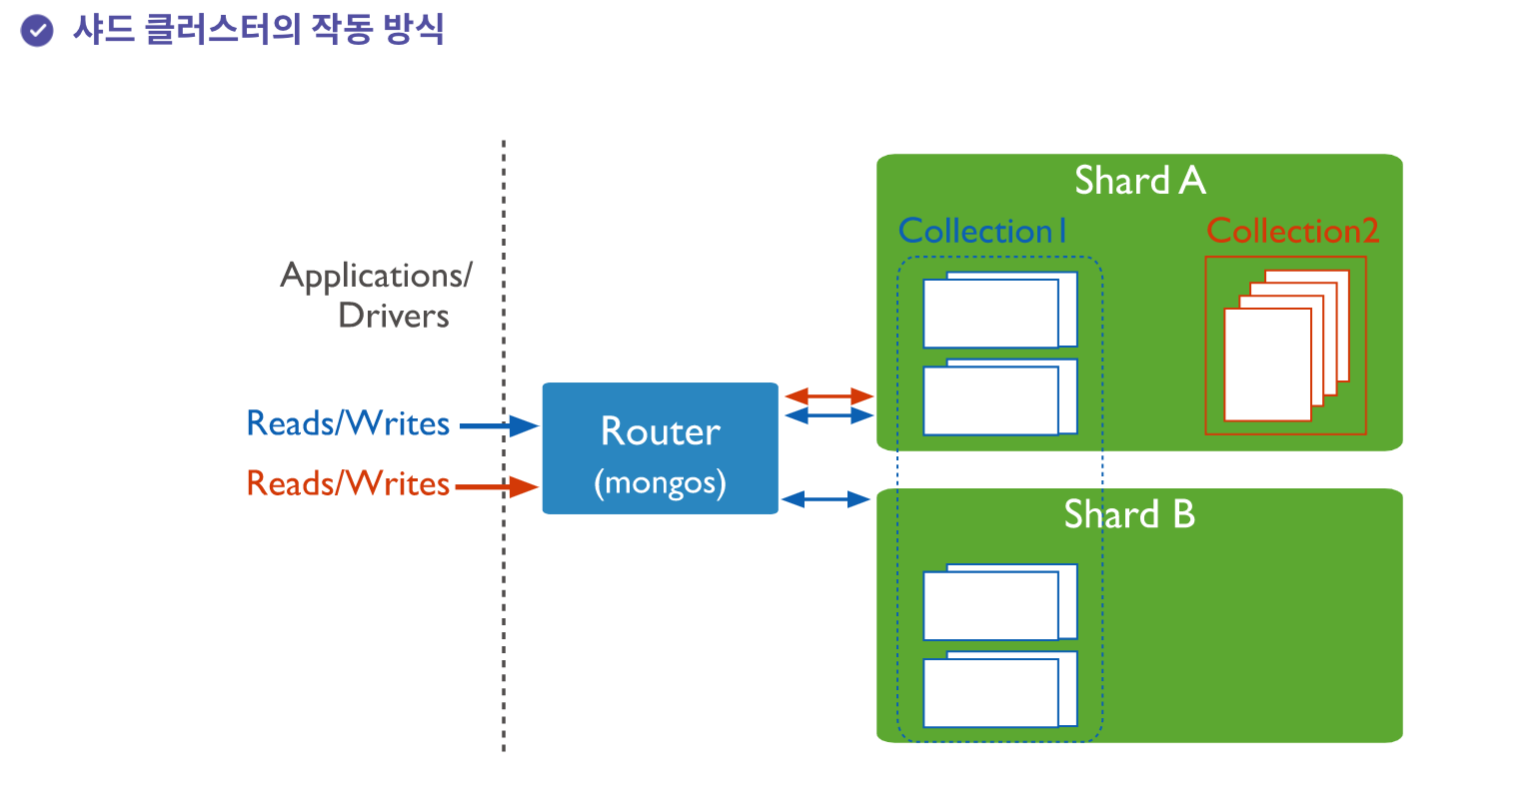

In [3]:
Image("as.png")

### 샤딩의 기준
<br>

# 범위 샤딩

# 해시 샤딩

# 구역 샤딩

샤딩은 특정 필드 값을 기준으로 정보를 분산시킨다.<br>
3가지 기준으로 도큐먼트를 분산시킬 수 있다.
<br>
<br>
샤드에 정보가 골고루 분산되어서 연산이 골고루 이루어져야 한다.


# 범위 샤딩

범위에 따라 분산하기 때문에 범위 조회 시 유리하다.<br>
하지만 특정 범위에 도큐먼트가 쏠리면 해당 샤드만 계속 바빠질 수 있다.<br>
<br>

# 해시 샤딩

장점: 두루두루 저장되어서 한쪽에 몰릴 가능성이 낮다.<br>
단점: 범위를 찾는 쿼리를 수행할 때 마다 다수의 클러스터에서 찾아야한다.<br>
<br>

# 구역 샤딩

개발자가 존을 정해서 분배하는 방식<br>
손이 많이 가지만 최적화된 샤드 구성을 만들 수 있다.